# Download data from the Joint Science Operations Center (JSOC)

By:

   - Alessandro Liberatore (alessandro.liberatore@jpl.nasa.gov)

The list of data and other infos about aviable data can be found at: http://jsoc.stanford.edu/ 

Import the following libraries:

In [17]:
from sunpy.net import Fido, attrs as a
import astropy.units as u
from sunpy.net import jsoc

After that, select your time range, instrument, detector, wavelenght, etc... (the complete list of instruments and commands can be found at the following links: [link1](https://docs.sunpy.org/en/stable/guide/acquiring_data/jsoc.html), [link2](https://docs.sunpy.org/en/stable/code_ref/net.html)):

Finally, select the path and download the data:

In [18]:
result = Fido.search(a.Time("2022-03-25T07:02:00", "2022-03-25T07:04:00"),
                     a.Instrument("AIA"),
                     a.Wavelength(171*u.angstrom))
print(result)

Results from 1 Provider:

10 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search
Total estimated size: 677.888 Mbyte

       Start Time       ...
                        ...
----------------------- ...
2022-03-25 07:02:09.000 ...
2022-03-25 07:02:21.000 ...
2022-03-25 07:02:33.000 ...
2022-03-25 07:02:45.000 ...
2022-03-25 07:02:57.000 ...
2022-03-25 07:03:09.000 ...
2022-03-25 07:03:21.000 ...
2022-03-25 07:03:33.000 ...
2022-03-25 07:03:45.000 ...
2022-03-25 07:03:57.000 ...




In [20]:
files = Fido.fetch(result, path = "/Users/liberato/Desktop/AIA171/{file}")

Files Downloaded:   0%|          | 0/10 [00:00<?, ?file/s]

5/0 files failed to download. Please check `.errors` for details


# How to receive by mail the list of data

First of all, you have to register your mail to the Joint Science Operations Center (JSOC):<br> http://jsoc.stanford.edu/ajax/register_email.html

Then, import the following libreries:

In [4]:
import astropy.units as u
from sunpy.net import jsoc
from sunpy.net import attrs as a

Select the time range, the data you are interested in, and your mail:

In [5]:
client = jsoc.JSOCClient()  
request = client.search(a.Time('2012-03-04T00:00:00', '2012-03-04T00:10:00'),
                       a.jsoc.Series('aia.lev1_euv_12s'), 
                       a.Wavelength(304*u.AA),
                       a.jsoc.Segment('image'), 
                       a.jsoc.Notify('alessandro.liberatore@jpl.nasa.gov'))  
print(request)  # analogous to: print("ID: {0}, Status: {1}".format(requests.id, requests.status))

       T_REC         TELESCOP INSTRUME WAVELNTH CAR_ROT
-------------------- -------- -------- -------- -------
2012-03-04T00:00:02Z  SDO/AIA    AIA_4      304    2120
2012-03-04T00:00:14Z  SDO/AIA    AIA_4      304    2120
2012-03-04T00:00:26Z  SDO/AIA    AIA_4      304    2120
2012-03-04T00:00:38Z  SDO/AIA    AIA_4      304    2120
2012-03-04T00:00:50Z  SDO/AIA    AIA_4      304    2120
2012-03-04T00:01:02Z  SDO/AIA    AIA_4      304    2120
2012-03-04T00:01:14Z  SDO/AIA    AIA_4      304    2120
                 ...      ...      ...      ...     ...
2012-03-04T00:08:50Z  SDO/AIA    AIA_4      304    2120
2012-03-04T00:09:02Z  SDO/AIA    AIA_4      304    2120
2012-03-04T00:09:14Z  SDO/AIA    AIA_4      304    2120
2012-03-04T00:09:26Z  SDO/AIA    AIA_4      304    2120
2012-03-04T00:09:38Z  SDO/AIA    AIA_4      304    2120
2012-03-04T00:09:50Z  SDO/AIA    AIA_4      304    2120
2012-03-04T00:10:02Z  SDO/AIA    AIA_4      304    2120
Length = 51 rows


Then, you should receive (in a few) a mail from JSOC with all the details of your request and a link to the images. Clickin on the link, you should be redirected to a page similar to the following one:

<div>
<img src="./images/JSOC_linkmail_example.png" width="500" align="left"/>
</div>

# Download cutouts

As shown in [link](https://docs.sunpy.org/en/stable/generated/gallery/acquiring_data/downloading_cutouts.html), it is possible to download only some cutouts.

In [6]:
# Enable interactive plot (version 1)
%matplotlib notebook

In [7]:
# Enable interactive plot (version 2)
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

First of all, import the following libraries:

In [8]:
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.visualization import ImageNormalize, SqrtStretch

import sunpy.coordinates  # NOQA
import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a

In [9]:
start_time = Time('2012-09-24T14:56:03', scale='utc', format='isot')
bottom_left = SkyCoord(-500*u.arcsec, -275*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")
top_right = SkyCoord(150*u.arcsec, 375*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")

Now construct the cutout from the coordinates above above using the ~sunpy.net.jsoc.attrs.Cutout attribute.

In [10]:
cutout = a.jsoc.Cutout(bottom_left, top_right=top_right, tracking=True)

In [11]:
query = Fido.search(
    a.Time(start_time - 6*u.h, start_time + 6*u.h),
    a.Wavelength(171*u.angstrom),
    a.Sample(2*u.h),  # every 2 hours
    a.jsoc.Series.aia_lev1_euv_12s,
    a.jsoc.Notify("alessandro.liberatore@jpl.nasa.gov"),
    a.jsoc.Segment.image,
    cutout,
)
print(query)

Results from 1 Provider:

7 Results from the JSOCClient:
Source: http://jsoc.stanford.edu

       T_REC         TELESCOP INSTRUME WAVELNTH CAR_ROT
-------------------- -------- -------- -------- -------
2012-09-24T08:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T10:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T12:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T14:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T16:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T18:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T20:56:01Z  SDO/AIA    AIA_3      171    2128




Submit the export request and download the data:

In [12]:
files = Fido.fetch(query, path="/Users/liberato/Desktop/cutouts_JSOC/{file}")
files.sort()

Export request pending. [id=JSOC_20221127_371, status=2]
Waiting for 0 seconds...
7 URLs found for download. Full request totalling 7MB


Files Downloaded:   0%|          | 0/7 [00:00<?, ?file/s]

Now that we have downloaded the files, we can create a `~sunpy.map.MapSequence` from them and animate them.

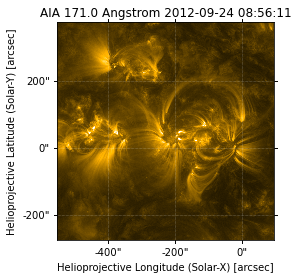

In [13]:
sequence = sunpy.map.Map(files, sequence = True)
anim = sequence.plot(norm = ImageNormalize(vmin = 0, vmax = 5e3, stretch = SqrtStretch()))

If we set `%matplotlib notebook` at the beginning (i.e., "#Enable interactive plot (version 1)"), we obtain a (not interactive) animation.

On the other hand, if we set `%matplotlib inline` (i.e., "# Enable interactive plot (version 2)") we can obtain an interactive animation but, for now, we see just a frame. To make the interactive JavaScript widget the default HTML representation, we have to set the `animation.html` rc parameter, which now supports the values `none`, `jshtml` and `html5`. The default is `none`, performing no display. We simply need to set it to `jshtml`:

In [14]:
rc('animation', html='jshtml')

Now we can just reference the Animation instance and display the widget inline:

In [16]:
anim